In [548]:
import numpy as np
import random
from random import sample
import math
import matplotlib.pyplot as plt

In [549]:
N = 10
alpha = 1/20
L = 1
def state(amount):
    Range = L / N
    new_state = []
    
    for i in range(N+1):
        if(i == 0):
            if(amount < Range):
                new_state = i       
        elif(i == N):
            if(amount >= L):
                new_state = i
        else:
            if(amount >= i*Range and amount < (i+1)*Range):
                new_state = i

    return(new_state)

In [550]:
state(0.3145654)

3

In [551]:
ci = 5
cp = 30
cc = 100
co = 0.01
T_step = 1
N_step = 4

def Rewardfun():
    Reward = np.zeros((N+1,)+(2*N_step,)) # 1:T Do nothing T+1:2*T Replace
    Reward[0:N+1,0:N_step] = -ci
    Reward[0:N,N_step:2*N_step] = -ci - cp
    for i in range(N+1):
        for j in range(2*N_step):
            Reward[i,j] -= co * (j%N_step+1)
    Reward[N,N_step:2*N_step] += -ci - cc
    return(Reward)

In [552]:
Rewardfun()

array([[  -5.01,   -5.02,   -5.03,   -5.04,  -35.01,  -35.02,  -35.03,
         -35.04],
       [  -5.01,   -5.02,   -5.03,   -5.04,  -35.01,  -35.02,  -35.03,
         -35.04],
       [  -5.01,   -5.02,   -5.03,   -5.04,  -35.01,  -35.02,  -35.03,
         -35.04],
       [  -5.01,   -5.02,   -5.03,   -5.04,  -35.01,  -35.02,  -35.03,
         -35.04],
       [  -5.01,   -5.02,   -5.03,   -5.04,  -35.01,  -35.02,  -35.03,
         -35.04],
       [  -5.01,   -5.02,   -5.03,   -5.04,  -35.01,  -35.02,  -35.03,
         -35.04],
       [  -5.01,   -5.02,   -5.03,   -5.04,  -35.01,  -35.02,  -35.03,
         -35.04],
       [  -5.01,   -5.02,   -5.03,   -5.04,  -35.01,  -35.02,  -35.03,
         -35.04],
       [  -5.01,   -5.02,   -5.03,   -5.04,  -35.01,  -35.02,  -35.03,
         -35.04],
       [  -5.01,   -5.02,   -5.03,   -5.04,  -35.01,  -35.02,  -35.03,
         -35.04],
       [  -5.01,   -5.02,   -5.03,   -5.04, -105.01, -105.02, -105.03,
        -105.04]])

In [553]:
Rewardfun().shape

(11, 8)

In [554]:
def Environment(x , action): 
    current_state = 0
    reward = 0
    if action[0] == 0:  #do nothing
        x = x + np.random.exponential(scale = alpha * action[1] , size = 1)
        current_state = state(x)
        R = Rewardfun()
        reward = R[current_state,int(action[1]/T_step)-1]
    if action[0] == 1:
        current_state = state(x)
        x = 0
        R = Rewardfun()
        reward = R[current_state, int(action[1]/T_step) + (N_step-1)]
        current_state = state(x)
    t = action[1]
    return (current_state,  reward, x, t)

In [555]:
x = 0

In [556]:
Environment(x = 0.5 , action = [1,T_step])

(0, -35.01, 0, 1)

In [557]:
Environment( x = 2.46134237 , action = [0,T_step*2])

(10, -5.02, array([2.57280172]), 2)

In [558]:
Current_Time = 0
x = 0
results = []
for i in range(20):
    action = [0,T_step]
    if(x > L):
        action[0] = 1
    current_state, reward, x  , T  = Environment( x , action)
    print(current_state , reward , x , T)
    print("Current_Time : ", Current_Time)
    results.append(x)
    Current_Time += T

0 -5.01 [0.08588706] 1
Current_Time :  0
1 -5.01 [0.10580452] 1
Current_Time :  1
1 -5.01 [0.17376756] 1
Current_Time :  2
1 -5.01 [0.17691287] 1
Current_Time :  3
2 -5.01 [0.25228975] 1
Current_Time :  4
2 -5.01 [0.27276158] 1
Current_Time :  5
2 -5.01 [0.28236578] 1
Current_Time :  6
3 -5.01 [0.32160767] 1
Current_Time :  7
3 -5.01 [0.34430904] 1
Current_Time :  8
3 -5.01 [0.35539599] 1
Current_Time :  9
3 -5.01 [0.37023984] 1
Current_Time :  10
3 -5.01 [0.37717706] 1
Current_Time :  11
4 -5.01 [0.41690575] 1
Current_Time :  12
4 -5.01 [0.42536443] 1
Current_Time :  13
5 -5.01 [0.51266316] 1
Current_Time :  14
6 -5.01 [0.62219054] 1
Current_Time :  15
6 -5.01 [0.62953715] 1
Current_Time :  16
6 -5.01 [0.63890224] 1
Current_Time :  17
8 -5.01 [0.80434785] 1
Current_Time :  18
8 -5.01 [0.8471558] 1
Current_Time :  19


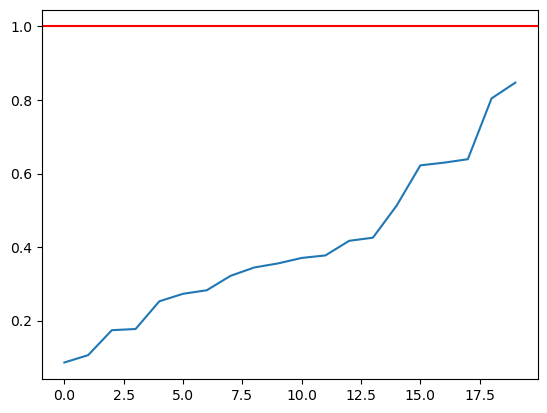

In [559]:
plt.plot(results)
plt.axhline(y = L,color="r")
plt.show()

In [560]:
x = 0
results = []
Current_Time = 0
R = Rewardfun()
list_T_step = []
for i in range(N_step):
    list_T_step.append((i+1) * T_step)
for i in range(100):
    action = [0,0]
    action[0] = np.random.choice([0,1],p=[0.8,0.2])
    action[1] = np.random.choice(list_T_step)
    if(x > L):
        action[0] = 1
    current_state = state(x)
    next_state, reward, x ,T = Environment( x , action)
    print("action = ",action, " , current state = ",current_state ,", next state = ", next_state ,", reward =", reward ,", x = ", x ,
          ", T = ",T , ", Past Time = " , Current_Time )
    Current_Time += T
    results.append(x)

action =  [0, 3]  , current state =  0 , next state =  2 , reward = -5.03 , x =  [0.29919038] , T =  3 , Past Time =  0
action =  [0, 2]  , current state =  2 , next state =  3 , reward = -5.02 , x =  [0.30234591] , T =  2 , Past Time =  3
action =  [0, 2]  , current state =  3 , next state =  3 , reward = -5.02 , x =  [0.34140122] , T =  2 , Past Time =  5
action =  [0, 3]  , current state =  3 , next state =  6 , reward = -5.03 , x =  [0.61519376] , T =  3 , Past Time =  7
action =  [0, 3]  , current state =  6 , next state =  7 , reward = -5.03 , x =  [0.75251073] , T =  3 , Past Time =  10
action =  [0, 4]  , current state =  7 , next state =  7 , reward = -5.04 , x =  [0.79044462] , T =  4 , Past Time =  13
action =  [0, 2]  , current state =  7 , next state =  10 , reward = -5.02 , x =  [1.03179357] , T =  2 , Past Time =  17
action =  [1, 1]  , current state =  10 , next state =  0 , reward = -105.01 , x =  0 , T =  1 , Past Time =  19
action =  [1, 1]  , current state =  0 , ne

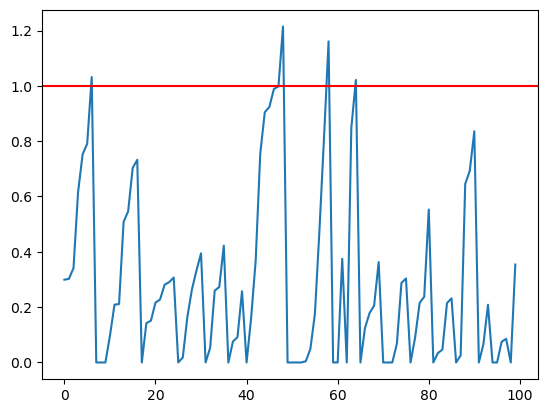

In [561]:
plt.plot(results)
plt.axhline(y = L,color="r")
plt.show()

In [562]:
def choose_action(epsilon, state):
    if(x > L):
        if(np.random.random() < epsilon):
            return [1,np.random.choice(list_T_step)]
        else:
            a_star = np.argmax(Q_table[state])   
            action = [1,0]
            action[1] = T_step * (a_star - (N_step-1))
            return action
    if (np.random.random() < epsilon):
        action = [0,0]
        action[0] = np.random.choice([0,1])
        action[1] = np.random.choice(list_T_step) 
        return action
    else:
        a_star = np.argmax(Q_table[state])   
        action = [0,0]
        if(int(a_star)/N_step < 1):
            action[0] = 0
            action[1] = T_step * (a_star + 1)
        else:
            action[0] = 1
            action[1] = T_step * (a_star - (N_step-1))
        return action

In [563]:
epsilon = 1
learning_rate = 1
discount = 0.9

Q_table = np.zeros((N+1,)+(2*N_step,))
Q_table[N,0:N_step] = -1000 
scores = []
for e in range(1000):
    x = 0
    current_state = 0
    rewards = []
    past_time = 0
    deg = []
    while(past_time < 750):
        action = choose_action(epsilon,current_state)

        new_state , reward , degradation , t  = Environment(x,action)
        rewards.append(reward)
        deg.append(degradation)
        if(action[0] == 0):
            action = int(action[1]/T_step) - 1
        else:
            action = int(action[1]/T_step) + (N_step-1)
        
        Q_table[current_state][action] += (learning_rate * 
                                        (reward 
                                         + discount * np.max(Q_table[new_state]) 
                                         - Q_table[current_state][action]))
        x = degradation
        current_state = new_state
        past_time += t
    learning_rate *= 0.99
    epsilon *= 0.99
    scores.append(sum(rewards))

In [564]:
np.round(Q_table,1)

array([[  -57.4,   -58.7,   -60.4,   -60.3,   -86.9,   -86.9,   -86.9,
          -87. ],
       [  -59.5,   -60.8,   -63. ,   -64.6,   -87. ,   -87.1,   -87. ,
          -87. ],
       [  -61.5,   -64. ,   -65.7,   -68.3,   -87.1,   -87.1,   -87. ,
          -87.2],
       [  -64. ,   -67.1,   -67.9,   -74. ,   -87.2,   -87. ,   -87.1,
          -87.2],
       [  -66.9,   -71.1,   -73.5,   -78.8,   -87. ,   -87.1,   -87.1,
          -87.4],
       [  -70.5,   -73.7,   -79.5,   -79.7,   -87.1,   -87.1,   -87.1,
          -87.1],
       [  -75. ,   -79.4,   -84.9,   -91.2,   -87.2,   -87.5,   -87.2,
          -87.2],
       [  -80.2,   -89.2,   -97.4,  -100.5,   -87.3,   -87.1,   -87.3,
          -87.1],
       [  -93.8,   -97.1,  -103.1,  -111.5,   -88.8,   -88.2,   -88.1,
          -86.7],
       [ -108.2,  -120.3,  -132.9,  -126.6,   -89.8,   -89.6,   -89.7,
          -86.7],
       [-1000. , -1000. , -1000. , -1000. ,  -159.5,  -159.5,  -156.8,
         -159.8]])

In [565]:
for i in range(N+1):
    action = [0,0]
    a_star = np.argmax(Q_table[i])
    if(int(a_star)/N_step < 1):
        action[0] = 0
        action[1] = T_step * (a_star + 1)
    else:
        action[0] = 1
        action[1] = T_step * (a_star - (N_step-1))
    print("State",i,end=" => ")
    print(action)

State 0 => [0, 1]
State 1 => [0, 1]
State 2 => [0, 1]
State 3 => [0, 1]
State 4 => [0, 1]
State 5 => [0, 1]
State 6 => [0, 1]
State 7 => [0, 1]
State 8 => [1, 4]
State 9 => [1, 4]
State 10 => [1, 3]


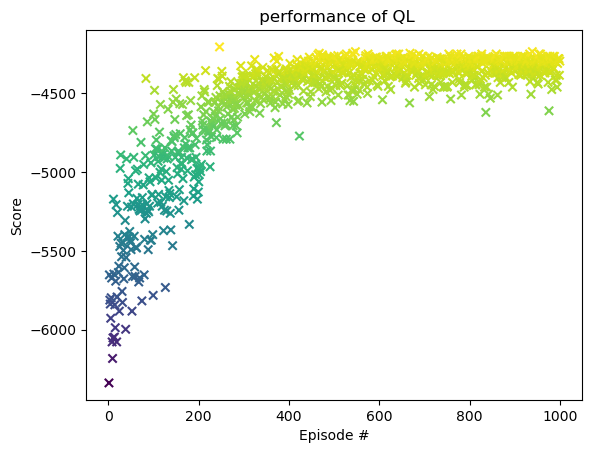

In [566]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.arange(1, len(scores) + 1)
y = scores
plt.scatter(x, y, marker='x', c=y)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title(' performance of QL')
plt.show()

In [567]:
deg

[array([1.01391227e-05]),
 array([0.12052059]),
 array([0.15682953]),
 array([0.16160697]),
 array([0.20587592]),
 array([0.23226617]),
 array([0.27933175]),
 array([0.41067552]),
 array([0.45076619]),
 array([0.50176862]),
 array([0.54180619]),
 array([0.82722438]),
 0,
 array([0.10426172]),
 array([0.10734834]),
 array([0.17207321]),
 array([0.25105512]),
 array([0.4646357]),
 array([0.48031934]),
 array([0.50629487]),
 array([0.5416061]),
 array([0.5796839]),
 array([0.66326338]),
 array([0.85858308]),
 0,
 array([0.01651868]),
 array([0.0485697]),
 array([0.08742099]),
 array([0.13434435]),
 array([0.19072868]),
 array([0.23300077]),
 array([0.28405104]),
 array([0.30426727]),
 array([0.31426841]),
 array([0.32740721]),
 array([0.4001111]),
 array([0.43057808]),
 array([0.55550887]),
 array([0.58842642]),
 array([0.63086495]),
 array([0.63722797]),
 array([0.6591003]),
 array([0.82055122]),
 0,
 array([0.03899876]),
 array([0.08934064]),
 array([0.147812]),
 array([0.26295206]),
 a

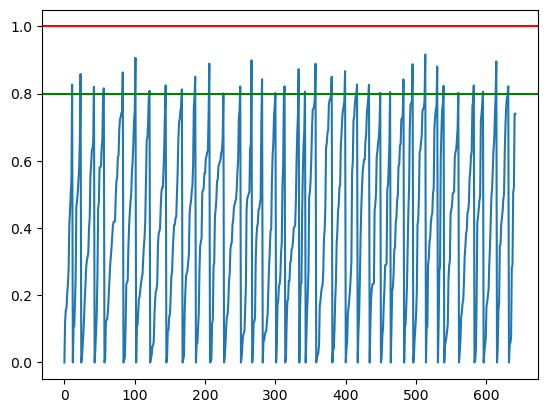

In [568]:
plt.plot(deg)
plt.axhline(y = L,color="r")
plt.axhline(y = 0.8 ,color="g")
plt.show()